# 3. Machine Learning Model
---

In [45]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

total_data = pd.read_csv(r'../data/processed/total_sales.csv')

In [46]:
from pmdarima import auto_arima
model = auto_arima(total_data, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1847.127, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1972.853, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1844.705, Time=0.71 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1843.274, Time=0.33 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=0.65 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1843.586, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1841.532, Time=0.24 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1843.435, Time=0.97 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=0.63 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1839.552, Time=0.12 sec
 ARIMA(1,1,1)(1,0,0)[12] inte

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Tue, 23 Jan 2024   AIC                           1839.552
Time:                        20:32:59   BIC                           1855.152
Sample:                             0   HQIC                          1845.752
                                - 366                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
forecast = model.predict(30)
forecast

366    1002.158148
367    1004.831669
368    1007.423289
369    1010.021630
370    1012.619419
371    1015.217254
372    1017.815084
373    1020.412915
374    1023.010746
375    1025.608577
376    1028.206409
377    1030.804240
378    1033.402071
379    1035.999902
380    1038.597733
381    1041.195564
382    1043.793395
383    1046.391226
384    1048.989057
385    1051.586888
386    1054.184719
387    1056.782550
388    1059.380381
389    1061.978212
390    1064.576043
391    1067.173874
392    1069.771705
393    1072.369536
394    1074.967367
395    1077.565198
dtype: float64

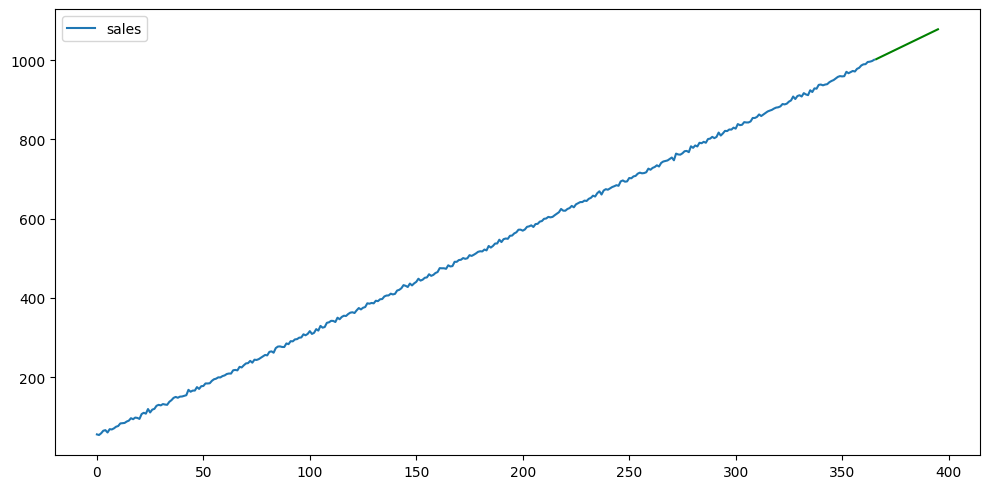

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = total_data)
sns.lineplot(data = forecast, c = "green")
plt.tight_layout()
plt.show()

In [52]:
from pickle import dump
dump(model, open("../models/time-series_ARIMA-1-1-1.sav", "wb"))

The model seems to predict the sales with accuracy.